In [227]:
import pandas as pd
import numpy as np

In [ ]:
# Walmart Sales Analysis - Descriptive Statistics for Holiday vs Non-Holiday Weeks

directory = "../Data/"
dataset_file_name = "Cleaned-Walmart_Sales.csv"
df = pd.read_csv(directory + "/" + dataset_file_name)

We have to remember, in our cleaned dataset, we removed some outliers, so some of the data is cut off. for better precision

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5923 non-null   int64  
 1   Date          5923 non-null   object 
 2   Weekly_Sales  5923 non-null   float64
 3   Holiday_Flag  5923 non-null   int64  
 4   Temperature   5923 non-null   float64
 5   Fuel_Price    5923 non-null   float64
 6   CPI           5923 non-null   float64
 7   Unemployment  5923 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 370.3+ KB


In [230]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [231]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5923.000000,5.923000e+03,5923.000000,5923.000000,5923.000000,5923.000000,5923.000000
mean,22.793854,1.041038e+06,0.069053,60.409046,3.340349,175.005846,7.721439
std,13.092308,5.543193e+05,0.253565,18.397096,0.458072,39.024239,1.243295
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.527446e+05,0.000000,46.945000,2.889000,132.763355,6.891000
50%,22.000000,9.478151e+05,0.000000,62.590000,3.417000,190.006988,7.852000
75%,34.000000,1.428915e+06,0.000000,74.715000,3.720500,213.791715,8.494000
max,45.000000,2.760347e+06,1.000000,100.140000,4.468000,227.232807,10.926000


In [232]:
df = pd.read_csv(directory + "/" + dataset_file_name, parse_dates=['Date'], dayfirst=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
5918,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
5919,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
5920,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
5921,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


Step 1: Holiday vs Non-Holiday Distribution

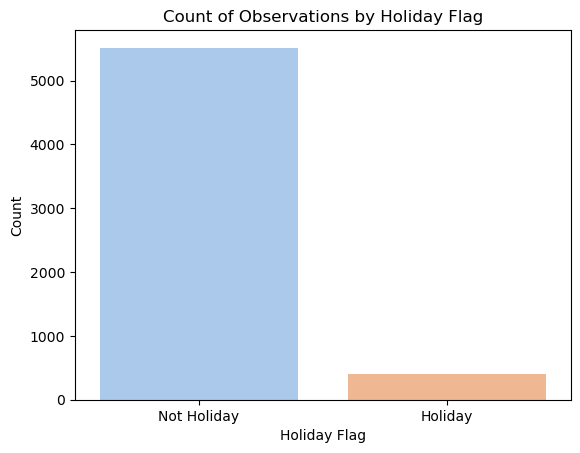

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Holiday_Flag", hue="Holiday_Flag", palette='pastel', legend=False)
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.title('Count of Observations by Holiday Flag')
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])

plt.show()

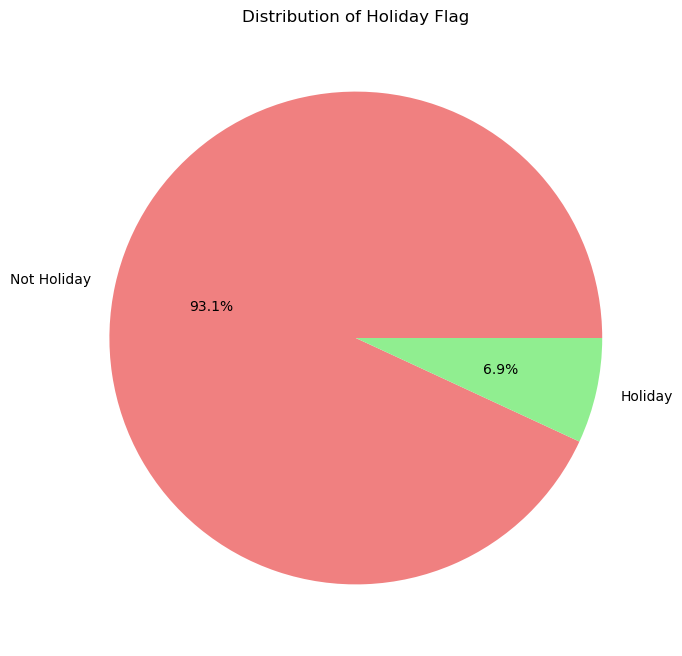

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df['Holiday_Flag'].value_counts(), labels=['Not Holiday', 'Holiday'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Holiday Flag')
plt.show()

Note: Approximately 6.9% of the weeks are holiday weeks.

Step 2: Descriptive Statistics of Weekly Sales

In [235]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

In [ ]:
holiday_stats = {
    'mean': holiday_sales.mean(),
    'median': holiday_sales.median(),
    'range': holiday_sales.max() - holiday_sales.min(),
    'std_dev': holiday_sales.std()
}

non_holiday_stats = {
    'mean': non_holiday_sales.mean(),
    'median': non_holiday_sales.median(),
    'range': non_holiday_sales.max() - non_holiday_sales.min(),
    'std_dev': non_holiday_sales.std()
}

print("Holiday Week Stats:\n", holiday_stats)
print("\nNon-Holiday Week Stats:\n", non_holiday_stats)

Holiday Week Stats:
 {'mean': 1088710.2884841077, 'median': 1004434.54, 'range': 2469992.6, 'std_dev': 585178.2664020403}

Non-Holiday Week Stats:
 {'mean': 1037502.0163003267, 'median': 944218.81, 'range': 2550360.46, 'std_dev': 551853.4158488763}


Observations:
- Holiday weeks generally have higher average and median sales.
- The distribution of holiday sales is more spread out, with greater variability.

Step 3: Visualizing the Distributions

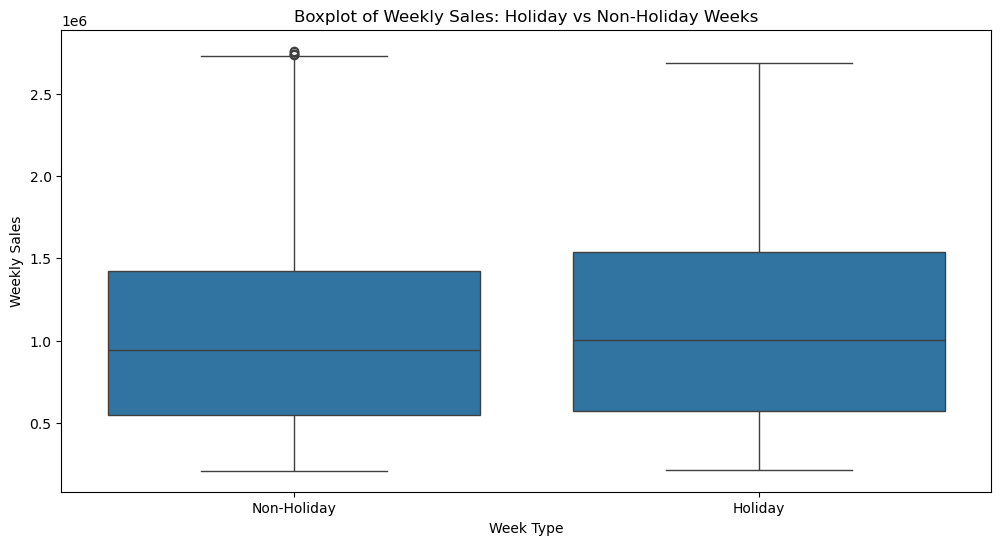

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Boxplot of Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.xlabel('Week Type')
plt.ylabel('Weekly Sales')
plt.show()

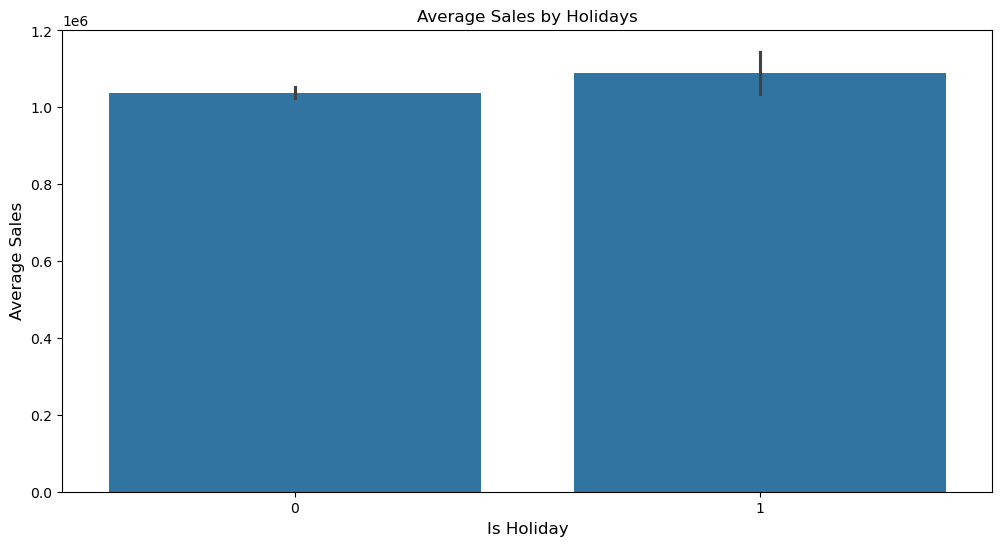

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(df,
            x = 'Holiday_Flag',
            y = 'Weekly_Sales',
            estimator = np.mean)

plt.title('Average Sales by Holidays')
plt.xlabel('Is Holiday', size = 12)
plt.ylabel('Average Sales', size = 12)
plt.show()

In [239]:
from scipy.stats import iqr, skew, kurtosis

def descriptive_stats(sales):
    return {
        'mean': sales.mean(),
        'median': sales.median(),
        'min': sales.min(),
        'max': sales.max(),
        'range': sales.max() - sales.min(),
        'std_dev': sales.std(),
        'iqr': iqr(sales),
        'skewness': skew(sales),
        'kurtosis': kurtosis(sales)
    }

holiday_stats_full = descriptive_stats(holiday_sales)
non_holiday_stats_full = descriptive_stats(non_holiday_sales)

print("📊 Holiday Week Stats:")
for k, v in holiday_stats_full.items():
    print(f"{k:<10}: {v:.2f}")

print("\n📊 Non-Holiday Week Stats:")
for k, v in non_holiday_stats_full.items():
    print(f"{k:<10}: {v:.2f}")


📊 Holiday Week Stats:
mean      : 1088710.29
median    : 1004434.54
min       : 215359.21
max       : 2685351.81
range     : 2469992.60
std_dev   : 585178.27
iqr       : 960540.11
skewness  : 0.51
kurtosis  : -0.68

📊 Non-Holiday Week Stats:
mean      : 1037502.02
median    : 944218.81
min       : 209986.25
max       : 2760346.71
range     : 2550360.46
std_dev   : 551853.42
iqr       : 872900.96
skewness  : 0.51
kurtosis  : -0.72


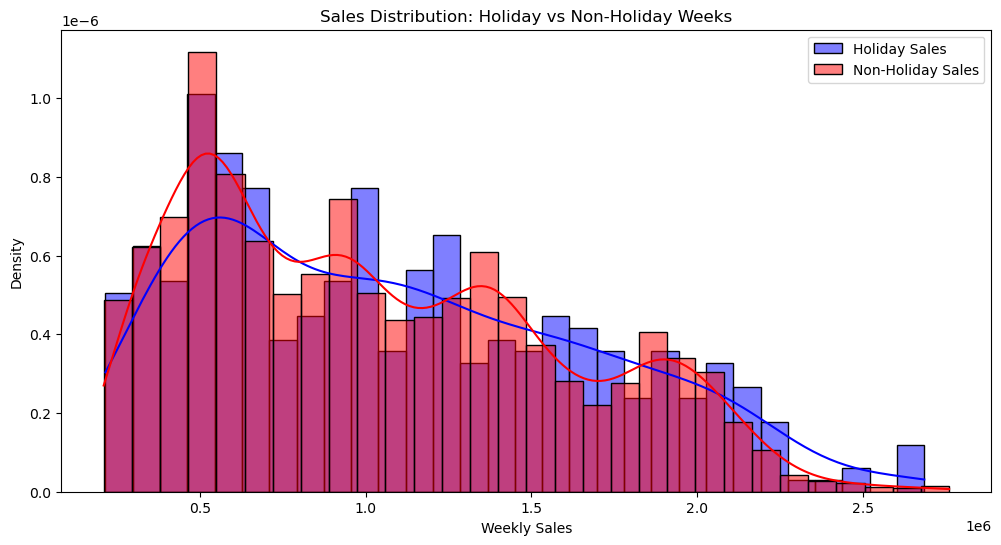

In [257]:
plt.figure(figsize=(12,6))
sns.histplot(holiday_sales, kde=True, color='blue', label='Holiday Sales', bins=30, stat='density')
sns.histplot(non_holiday_sales, kde=True, color='red', label='Non-Holiday Sales', bins=30, stat='density')
plt.legend()
plt.title('Sales Distribution: Holiday vs Non-Holiday Weeks')
plt.xlabel('Weekly Sales')
plt.ylabel('Density')
plt.show()

Interpretation:
- Red curve (Non-Holiday): Peaks higher around 500,000 - 600,000 sales.
- Green curve (Holiday): Flatter, more spread out, extending further into higher sales (above 1.5M).
- Considerable overlap exists, but holiday weeks tend to dominate high sales values.

Step 4: Levene’s Test for Variance Comparison

In [241]:
df.groupby('Holiday_Flag')['Weekly_Sales'].sum()

Holiday_Flag
0    5.720786e+09
1    4.452825e+08
Name: Weekly_Sales, dtype: float64

In [242]:
from scipy.stats import levene

stat, p = levene(holiday_sales, non_holiday_sales)
print(f"Levene’s Test for Equality of Variance: stat={stat:.4f}, p={p:.4f}")

if p < 0.05:
    print("✅ Significant difference in variance between holiday and non-holiday weeks.")
else:
    print("❌ No significant difference in variance.")

Levene’s Test for Equality of Variance: stat=2.6775, p=0.1018
❌ No significant difference in variance.


Levene’s test for equality of variance yielded a test statistic of 2.6775 and a p-value of 0.1018. Since the p-value is greater than the standard significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the variance of weekly sales between holiday and non-holiday weeks

Our hypothesis that holiday weeks would show significantly higher variance in sales is not supported by the statistical test.

Since we can't support our hypothesis, and i can see on the sales distrubution that the sales have some larger difference when it comes to the part of the year. so let's split it up in seasons 

Step 5: Investigating Seasonality to Explain Variance"

In [243]:
def season_getter(quarter):
    quarter_to_season = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    return quarter_to_season.get(quarter, 'Invalid Quarter')

In [244]:
print(season_getter(1))  
print(season_getter(3))  
print(season_getter(4))
print(season_getter(2)) 

Winter
Summer
Fall
Spring


In [ ]:
import calendar

df = df.assign(
    year=df['Date'].dt.year, 
    quarter=df['Date'].dt.quarter,
    season=df['Date'].dt.quarter.map(season_getter), 
    month=df['Date'].dt.month, 
    month_name=df['Date'].dt.month_name(), 
    week=df['Date'].dt.isocalendar().week,  
    day_of_week=df['Date'].dt.day_name()
)

In [246]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,Winter,3,March,9,Friday


/var/folders/j7/q5pvk4m96_3dn1ktgjm99xwm0000gn/T/ipykernel_24264/2070825365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='season', ax=ax, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])


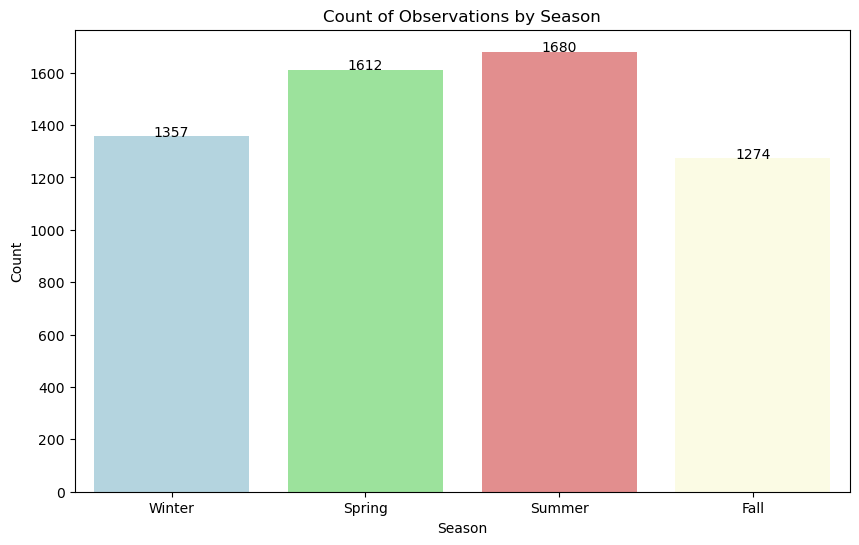

In [ ]:
season_counts = df['season'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(data=df, x='season', ax=ax, palette=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

plt.title('Count of Observations by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

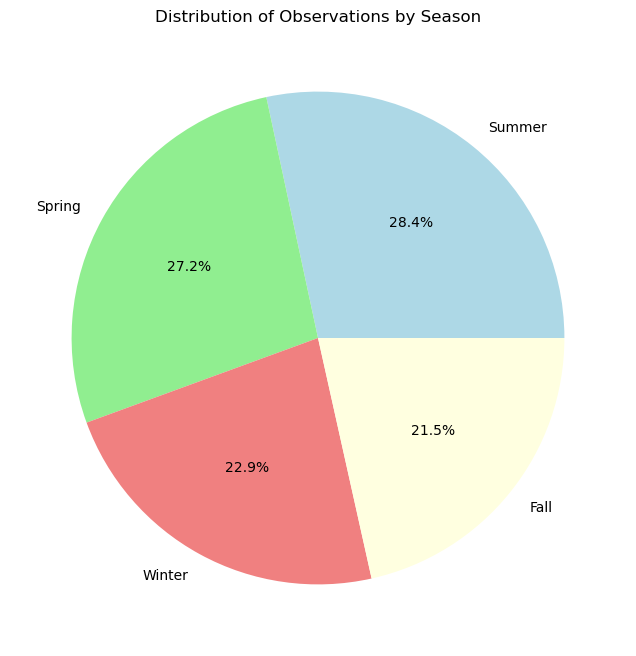

In [ ]:
season_counts = df['season'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Distribution of Observations by Season')
plt.show()

We can see that summer has the best permformance

In [254]:
df.groupby('season')['Weekly_Sales'].sum().sort_values(ascending = False)

season
Summer    1.713286e+09
Spring    1.690933e+09
Fall      1.389966e+09
Winter    1.371883e+09
Name: Weekly_Sales, dtype: float64

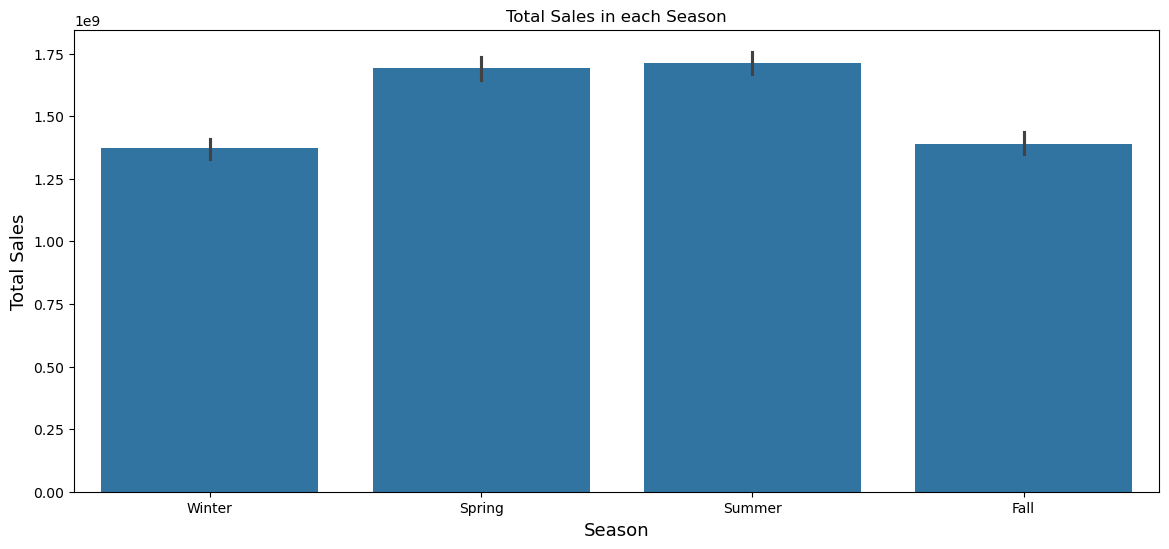

In [ ]:
plt.figure(figsize = (14, 6))
sns.barplot(data = df,
            x = 'season',
            y = 'Weekly_Sales',
            estimator = np.sum)

plt.title('Total Sales in each Season')
plt.xlabel('Season', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.show()

Interpretation:
- Summer and Fall have higher total and average sales.
- Sales variability differs by season.
- Seasonality appears to be a stronger driver of sales variance than holiday flag.

Conclusion:
- Our hypothesis that holiday weeks would have higher variance in sales is not supported by Levene’s test.
- Seasonal patterns better explain variations in weekly sales.
- Further analysis may consider more granular data or additional factors.